# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Introducción a transformers</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. Ashish Vaswani et al.,  [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), diciembre 2017.
1. Dennis Rothman, [Transformers for Natural Language processing](http://libgen.rs/search.php?req=Transformers+for+Natural+Language+processing&open=0&res=25&view=simple&phrase=1&column=def), enero 2021.
1. Varios,[Dive into deep learning](https://d2l.ai/), enero 2021
1. Basado en [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)
1. Alexander Rush et al., [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)
1. Jay Alammar, [The illustrated transformer](https://jalammar.github.io/illustrated-transformer/)
1. Jay Alammar, [Visualizing neural machine translation mechanics of seq2seq models with attention](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Mecanismo de atención](#Mecanismo-de-atención)
* [Ventanas infinitas](#Ventanas-infinitas)
* [Atención es todo lo que se necesita](#Atención-es-todo-lo-que-se-necesita)
* [Embeddings de entrada](#Embeddings-de-entrada)
* [Codificación posicional](#Codificación-posicional)
* [Capa codificadora](#Capa-codificadora)
* [Atención de múltiples cabezas](#Atención-de-múltiples-cabezas)
* [Mecanismo de atención](#Mecanismo-de-atención)
* [Transformer](#Transformer)
* [Cómputo de la atención  multi-cabeza](#Cómputo-de-la-atención-multi-cabeza)
* [Las conexiones residuales, la normalización de capas y la red de retroalimentación](#Las-conexiones-residuales,-la-normalización-de-capas-y-la-red-de-retroalimentación)
* [Envoltura del codificador](#Envoltura-del-codificador)
* [Capa decodificador](#Capa-decodificador)


## <span style="color:blue">Introducción</span>

Este cuaderno es una adaptación del blog [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0).

Los transformers están arrasando en el mundo del procesamiento del lenguaje natural. 

Estos increíbles modelos están batiendo múltiples récords de PLN y están impulsando el estado del arte. 

Se utilizan en muchas aplicaciones como traducción de lenguaje automático, chatbots conversacionales e incluso para impulsar mejores motores de búsqueda. 

Los transformers están de moda en el aprendizaje profundo hoy en día, pero ¿cómo funcionan? ¿Por qué han superado al anterior rey de los problemas de secuencia, como las redes neuronales recurrentes, GRU y LSTM? 

Probablemente haya oído hablar de diferentes modelos de transformers famosos como BERT, GPT y GPT2. En esta lección, nos centraremos en el documento que lo inició todo, [Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf).


## <span style="color:blue">Mecanismo de atención</span>


Para entender los transformers primero debemos comprender el mecanismo de atención.

El mecanismo de Atención permite que los transformers tengan una memoria a muy largo plazo. Un modelo de transformer puede "atender" o "concentrarse" en todos los tokens anteriores que se han generado.

Veamos un ejemplo. Digamos que queremos escribir una novela corta de ciencia ficción con un transformer generativo. El siguiente es un ejemplo real obtenido usando  [Hugging Face’s](https://huggingface.co/) [Write With Transformer](https://transformer.huggingface.co/).

**Nuestra entrada**: “As Aliens entered our planet”.

**Salida del Transformer**: *“and began to colonized Earth, a certain group of extraterrestrials began to manipulate our society through their influences of a certain number of the elite to keep and iron grip over the populace.”*


<figure>
<center>
<img src="../Imagenes/Mecanismo_Atencion.gif" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Mecanismo de atención</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

## <span style="color:blue">Ventanas infinitas</span>

Las redes neuronales recurrentes (RNN) también son capaces de buscar entradas anteriores. 

Pero el poder del mecanismo de atención es que *no sufre de memoria a corto plazo*. 

Los RNN tienen una ventana más corta para hacer referencia, por lo que cuando la historia se alarga, los RNN no pueden acceder a las palabras generadas anteriormente en la secuencia. 

Esto sigue siendo cierto para las redes de unidades recurrentes cerradas (GRU) y de memoria a largo y corto plazo (LSTM), aunque tienen una mayor capacidad para lograr memoria a más largo plazo, por lo que tienen una ventana más larga para hacer referencia. 

El mecanismo de atención, en teoría, y con suficientes recursos informáticos, tiene una ventana infinita desde la que se puede hacer referencia a las palabras anteriores, por lo que es capaz de utilizar todo el contexto de la historia mientras se genera el texto.

<figure>
<center>
<img src="../Imagenes/Ventanas.gif" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Mecanismo de atención</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

## <span style="color:blue">Atención es todo lo que se necesita</span>


El poder del mecanismo de atención se demostró en el artículo [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), donde los autores introdujeron una nueva red neuronal novedosa llamada Transformers, que es una arquitectura de tipo codificador-decodificador basada en la atención.



![Transformer-arquitectura](../Imagenes/transformer.png)

<center>Arquitectura de una transformer</center>

Fuente: [Attention? Attention!](https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html)

<figure>
<center>
<img src="../Imagenes/Arquitectura_Transformer.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Arquitectura Transformer</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

En un nivel alto, el codificador mapea una secuencia de entrada en una representación continua abstracta que contiene toda la información aprendida de esa entrada. 

El decodificador luego toma esa representación continua y paso a paso genera una única salida mientras también se alimenta la salida anterior.

Veamos un ejemplo. El artículo aplicó el modelo Transformer a un problema de traducción automática neuronal. En esta lección, demostraremos cómo funcionará para un chatbot conversacional.


**Nuestra entrada**: *“Hi how are you”*

**Salida del Transformer**: *“I am fine”*


## <span style="color:blue">Embeddings de entrada</span> 

El primer paso es enviar la entrada a una capa de incrustación (embedding) de palabras. 

Una capa de embedding de palabras se puede considerar como una tabla de búsqueda para obtener una representación vectorial aprendida de cada palabra. 

Las redes neuronales aprenden a través de números, por lo que cada palabra se asigna a un vector con valores continuos para representar esa palabra.

<figure>
<center>
<img src="../Imagenes/Input_embedding.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Embeddings de entrada</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

## <span style="color:blue">Codificación posicional</span> 

Para enteder mejor los detalle de esta sección, coonsulte [transformer architecture positional encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)

El siguiente paso es inyectar información posicional en las incrustaciones. 

Debido a que el codificador del transformer no tiene recurrencia como las redes neuronales recurrentes, debemos agregar algo de información sobre las posiciones en las incorporaciones de entrada. 

Esto se hace mediante codificación posicional. Los autores idearon un truco inteligente utilizando las funciones seno y coseno.

$$
\text{PE}_{(\text{pos},2i)} = \sin \left(\frac{pos}{10000^{2i/d_{\text{model}}}} \right)
$$

$$
\text{PE}_{(\text{pos},2i+1)} = \cos \left(\frac{pos}{10000^{2i/d_{\text{model}}}} \right)
$$

<center>Codificación posicional</center>


1. Para cada índice *impar* en el vector de entrada, se crea un vector usando la función *cos*. 
2. Para cada índice *par*, se crea un vector usando la función *sin*.

Luego se suman  estos vectores a sus incrustaciones de entrada correspondientes. 

Esto le da a la red información sobre la posición de cada vector. 

Las funciones de seno y coseno se eligieron en conjunto porque tienen propiedades lineales que el modelo puede aprender a atender fácilmente.

La siguiente es una clase ejemplo para hacer una codificación posicional

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
    '''Codificador posional
    position: posción de la palabra en esta secuencia
    d_model: tamaño del embedding
    '''

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
  
    def get_config(self):

        config = super(PositionalEncoding, self).get_config()
        config.update({
            'position': self.position,
            'd_model': self.d_model,
            
        })
        return config

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        # apply sin to even index in the array
        sines = tf.math.sin(angle_rads[:, 0::2])
        # apply cos to odd index in the array
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

El vector de codificación posicional se agrega al vector de incrustación (embdedding). Observe la función *call*. Las incrustaciones representan un token en un espacio d-dimensional donde los tokens con un significado similar estarán más cerca unos de otros. Pero las incrustaciones no codifican la posición relativa de las palabras en una oración. Entonces, después de agregar la codificación posicional, las palabras estarán más cerca entre sí en función de la similitud de su significado y su posición en la oración, en el espacio d-dimensional.

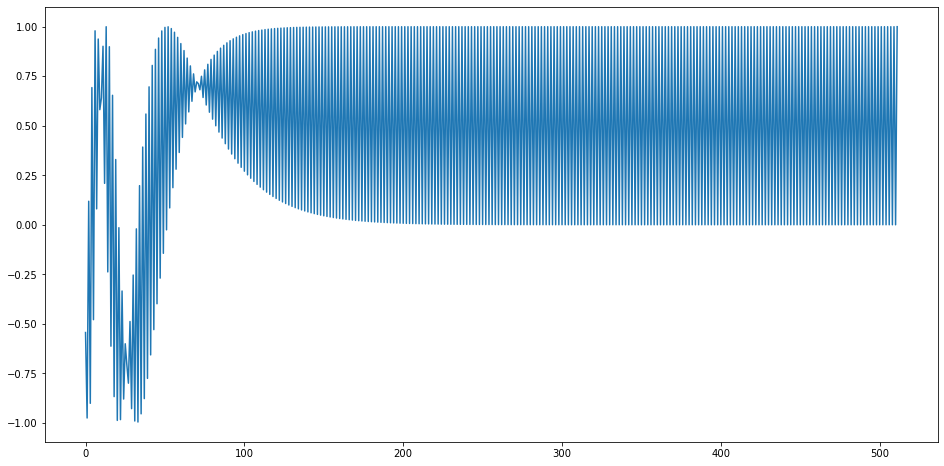

In [1]:
import matplotlib.pyplot as plt
import numpy as np


d_model = 512
x_sin = list(range(0,d_model,2))
x_cos = list(range(1,d_model,2))

pos = 10

y_sin = []
y_cos = []

for x_i in x_sin:
    y_sin.append(np.sin(pos/(10000**(2*x_i/d_model))))

for x_i in x_cos:
    y_cos.append(np.cos(pos/(10000**(2*x_i/d_model))))

x = list(range(d_model))

y = []
for i,j in zip(y_sin, y_cos):
    y.append(i)
    y.append(j)

plt.figure(figsize=(16,8))
plt.plot(x[0:512], y[0:512])

In [10]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates
    
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 2048, 512)


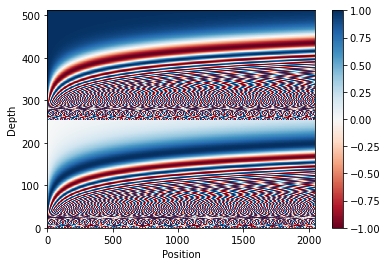

In [11]:
n, d = 2048, 512
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

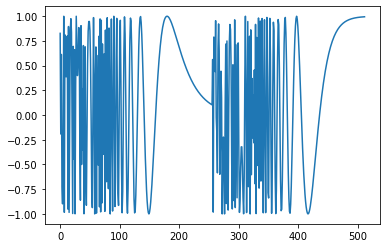

In [22]:
y= pos_encoding.numpy()
plt.plot(x,y[:,1000])
plt.show()

## <span style="color:blue">Capa codificadora</span> 

Encoder. Ahora tenemos la capa del codificador. 

El trabajo de capas de codificadores consiste en mapear todas las secuencias de entrada en una representación continua abstracta que contiene la información aprendida para toda esa secuencia.

Contiene 2 submódulos:

1. atención de múltiples cabezas, 
2. una red completamente conectada. 

También hay conexiones residuales alrededor de cada una de las dos subcapas seguidas de una normalización de capa.

<figure>
<center>
<img src="../Imagenes/Encoder_layers.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Módulo de codificación</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

## <span style="color:blue">Atención de múltiples cabezas</span> 

Multi-headed attention. La atención de múltiples cabezas en el codificador aplica un mecanismo de atención específico llamado auto-atención (self-attention). 

La auto-atención permite a los modelos asociar cada palabra en la entrada con otras palabras. 

Entonces, en nuestro ejemplo, es posible que nuestro modelo pueda aprender a asociar la palabra "Hi" con "how", "are" y "you". 

También es posible que el modelo aprenda que las palabras estructuradas en este patrón suelen ser una pregunta, de tal manera que responda de manera apropiada.

<figure>
<center>
<img src="../Imagenes/self_attention.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Mecanismo de auto-atención (self-attention)</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

Vamos a revisar cada componente del mecanismo de atención multi-cabeza.

### Vectores de consulta, clave y valor

Query, Key, and Value Vectors. 

Para lograr la atención propiamente dicho, alimentamos la entrada en 3 capas distintas completamente conectadas para crear los vectores de consulta, clave y valor.


El concepto de  (consulta, clave, valor) provienen del mundo de los sistemas de consulta. 

Por ejemplo, cuando escribe una consulta para buscar algún video en Youtube, el motor de búsqueda mapeará su consulta con un conjunto de claves (título del video, descripción, etc.) asociadas con los videos candidatos en la base de datos, luego le presentará los mejores videos (valores).


¿Cuáles son estos vectores exactamente en el caso de un transformer? 

### La función de atención  producto punto escalado 

La `función de atención  producto punto escalado`  que utiliza el transformer toma tres entradas: Q (consulta), K (clave), V (valor). La ecuación utilizada para calcular los pesos de atención es:

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$



La normalización de softmax se realiza en la `clave`, sus valores deciden la importancia que se le da a la `consulta`.

La salida representa la multiplicación de los pesos de atención y el vector de `valor`. Esto asegura que las palabras en las que queremos centrarnos se mantengan como están y que las palabras irrelevantes se eliminen.

La atención  producto punto escalado se escala por un factor de raíz cuadrada de la profundidad. Esto se hace porque para valores grandes de profundidad, el producto escalar aumenta en magnitud empujando la función softmax donde tiene pequeños gradientes que resultan en un softmax muy duro.

Por ejemplo, considere que "query" y "key" tienen una media de 0 y una varianza de 1. Su multiplicación de matrices tendrá una media de 0 y una varianza de `dk`. Por lo tanto, *la raíz cuadrada de `dk`* se usa para escalar (y no cualquier otro número) porque el matmul de` query` y `key` debe tener una media de 0 y una varianza de 1, por lo que obtenemos un softmax más suave .

### Enmascaramiento del softmax

Las secuencias de entrada  se rellenan con ceros (padding), cuando es  necesario, para que todas tengan una longitud fija. Pero entonces eso valores, no deben tenerse en cuenta en el mecanismo de atención. Lo que se hace es crear una `máscara`. Un máscara en este caso será un vector que tendrá unos para cada valor en la clave que tenga cero. 

La máscara se multiplica por * -1e9 (cerca del infinito negativo). * Esto se hace porque la máscara se suma con la multiplicación de la matriz escalada de `query` y` key` y se aplica inmediatamente antes de un softmax. El objetivo es poner a cero estas celdas, para lo cual,  las grandes entradas negativas a softmax están cerca de cero en la salida.

Revise el siguiente código de implementación del mecanismo de atención producto punto escalado (y enmascarado)

In [ ]:
def scaled_dot_product_attention(query, key, value, mask):
    """Calculate the attention weights. """
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # add the mask to zero out padding tokens
    if mask is not None:
        logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    output = tf.matmul(attention_weights, value)

    return output

## <span style="color:blue">Mecanismo de atención multi-cabeza</span> 

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">

La atención de multi-cabeza consta de cuatro partes:

* Capas lineales y divididas en cabezas.
* Atención de productos punto escalados.
* Concatenación de cabezas.
* Capa lineal final.


Cada bloque de atención multi-cabeza recibe tres entradas; Q (consulta), K (clave), V (valor). Estos se colocan en capas lineales (densas) y se dividen luego en varias cabezas.

La función scaled_dot_product_attention definida anteriormente se aplica a cada encabezado (transmitido por eficiencia). 

Se debe utilizar una máscara adecuada en el paso de atención. La salida de procedimiento de  atención de cada cabeza se concatena (usando tf.transpose y tf.reshape ne nuestro código) y se pasa a través de una capa densa final.

En lugar de una sola cabeza de atención, la consulta Q, la clave K y el valor V se dividen en múltiples cabezas para permiter que el modelo atienda conjuntamente la información en diferentes posiciones de diferentes espacios de representación.

Después de la división, cada cabezal tiene una dimensionalidad reducida, por lo que el costo total de cálculo es el mismo que el de una atención de un solo cabezal con dimensionalidad completa.

El siguiente código muestra la clase *MultiHeadAttention* que implementa el mecanismo de atención multi-cabezal.

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    '''Mecanismo multicabez
    num_heads: número de cabezas
    d_model: tamaño del embedding
    en el paper original 
    d_model=512 y num_heads=8
    '''
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)
  
      def get_config(self):
        config = super(MultiHeadAttention,self).get_config()
        config.update({
            'num_heads':self.num_heads,
            'd_model':self.d_model,
        })
        return config

      def split_heads(self, inputs, batch_size):
        inputs = tf.keras.layers.Lambda(lambda inputs:tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth)))(inputs)
        return tf.keras.layers.Lambda(lambda inputs: tf.transpose(inputs, perm=[0, 2, 1, 3]))(inputs)

      def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # split heads
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # scaled dot-product attention
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        scaled_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.transpose(
            scaled_attention, perm=[0, 2, 1, 3]))(scaled_attention)

        # concatenation of heads
        concat_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model)))(scaled_attention)

        # final linear layer
        outputs = self.dense(concat_attention)

        return outputs    

### Explicación paso a paso

Después de alimentar la consulta, la clave y el vector de valor a través de una capa lineal, las consultas y las claves se someten a una multiplicación de matriz de producto escalar para producir una matriz de puntuación.


<figure>
<center>
<img src="../Imagenes/Producto_query_key.gif" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> producto matricial consulta-clave(query-key)</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

La matriz de puntuación (scores) determina cuánta atención se debe poner una palabra en otras palabras. 

Entonces, cada palabra tendrá una puntuación que se corresponde con otras palabras en el intervalo de tiempo. Cuanto mayor sea la puntuación, más atención. Así es como se asignan las consultas a las claves.

<figure>
<center>
<img src="../Imagenes/Attention_scores.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Puntajes de atención(attention-scores)</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

### Escalación de las puntuaciones de atención


Luego, los  puntajes se escalan dividiendo por la raíz cuadrada de la dimensión de la consulta y la clave. 

Esto es para permitir gradientes más estables, ya que la multiplicación de valores puede tener efectos explosivos.

<figure>
<center>
<img src="../Imagenes/scaling_socres.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Escalación de puntajes</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

### Softmax de las puntuaciones escaladas

A continuación, se calcula el *softmax* de la puntuación escalada para obtener los pesos de atención, lo que le da valores de probabilidad entre 0 y 1. 

Al hacer un *softmax*, las puntuaciones más altas aumentan y las puntuaciones más bajas se deprimen. El enmascaramiento perimite que palabras de relleno (padding) tenga un peso de atención, básicamente cero.

Esto permite que el modelo tenga más confianza en las palabras que debe atender.

<figure>
<center>
<img src="../Imagenes/Softmax_of _scaled_scores.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Softmax de los puntajes escalados</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

### Multiplicar la salida Softmax con el vector de valor

Luego, se toman los pesos de atención y los multiplica por su vector de valor para obtener un vector de salida. 

Las puntuaciones softmax más altas mantendrán el valor de las palabras que el modelo aprende es más importante. Los puntajes más bajos ahogarán las palabras irrelevantes. 

Luego, se alimenta la salida con una capa lineal para continuar el procesamiento.


<figure>
<center>
<img src="../Imagenes/Score_por_Value.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Puntajes de atención  X valor </p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

## <span style="color:blue">Transformer</span> 

### Enmascaramiento

Primero mostraremos como crear funciones para enmascarar todos los tokens de pad (valor 0) en el lote y asegurarse de que el modelo no trate el padding como entrada.

*create_padding_mask* y *create_look_ahead* son funciones auxiliares que crean máscaras para enmascarar tokens rellenados, vamos a utilizar estas funciones auxiliares como capas *tf.keras.layers.Lambda*.


In [ ]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]


In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

Adicionalmente es necesario enmascarar los tokens futuros en una secuencia. Así por ejemplo, para predecir la tercera palabra, solo se utilizarán la primera y la segunda palabra


In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

## <span style="color:blue">Cómputo de la atención  multi-cabezas</span>


Para hacer de este un cálculo de atención de múltiples cabezas, se debe dividir la consulta, la clave y el valor en *N* vectores antes de aplicar la atención propia. 

Los vectores divididos luego pasan por el proceso de auto-atención individualmente. 

Cada proceso de auto-atención se llama cabeza. 

Cada cabezal produce un vector de salida que se concatena en un solo vector antes de pasar por la capa lineal final. 

En teoría, cada cabeza aprendería algo diferente, lo que le daría al modelo de codificador más poder de representación.

<figure>
<center>
<img src="../Imagenes/Split_query_value_key.gif" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Separa consulta, clave y valor en distintas cabezas de auto-atención </p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

En resumen, la atención de múltiples cabezas es un módulo en la red transformer que calcula los pesos de atención para la entrada y produce un vector de salida con información codificada sobre cómo cada palabra debe atender a todas las demás palabras en la secuencia.

## <span style="color:blue">Las conexiones residuales, la normalización de capas y la red de retroalimentación</span>

El vector de salida de atención de multi-cabeza se suma al embedding de entrada posicional original. 

A esto se le llama conexión residual. 

La salida de la conexión residual pasa por una normalización de capa.

<figure>
<center>
<img src="../Imagenes/Residual-conexion.gif" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Conexión Residual y capa de normalización</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

La salida residual normalizada se proyecta a través de una red de avance puntual para su posterior procesamiento. 

La red de avance puntual es un par de capas lineales con una activación ReLU en el medio. 

La salida de eso se suma de nuevo a la entrada de la red de avance puntual y se normaliza aún más.

<figure>
<center>
<img src="../Imagenes/Suma_capas_normalizacion.gif" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Conexión residual de la entrada y salida de la capa feedforward puntual</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

Las conexiones residuales ayudan al entrenamiento de la red, permitiendo que los gradientes fluyan directamente a través de las redes. Las normalizaciones de capa se utilizan para estabilizar la red lo que resulta en una reducción sustancial del tiempo de entrenamiento necesario. 

La capa de avance puntual se utiliza para proyectar las salidas de atención, lo que potencialmente le da una representación más rica.

## <span style="color:blue">Envoltura del codificador</span>

Todas estas operaciones son para codificar la entrada en una representación continua con información de atención. 

Esto ayudará al decodificador a enfocarse en las palabras apropiadas en la entrada durante el proceso de decodificación. 

Se puede apilar el codificador *N* veces para codificar aún más la información, donde cada capa tiene la oportunidad de aprender diferentes representaciones de atención, lo que potencialmente aumenta el poder predictivo de la red de transformers

## <span style="color:blue">Capa decodificador</span>

El trabajo del decodificador es generar secuencias de texto. 

El decodificador tiene una subcapa similar a la del codificador. 

Tiene dos capas de atención de múltiples cabezas, una capa de avance puntual y conexiones residuales, y una normalización de capa después de cada subcapa. 

Estas subcapas se comportan de manera similar a las capas del codificador, pero cada capa de atención de múltiples cabezas tiene un trabajo diferente. 

El decodificador está rematado con una capa lineal que actúa como clasificador y un softmax para obtener las  probabilidades de las palabras.

<figure>
<center>
<img src="../Imagenes/Decoder.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Estructura del decodificador</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

El decodificador es autorregresivo. 

Comienza con un token de inicio y toma una lista de salidas anteriores como entradas, así como las salidas del codificador que contienen la información de atención de la entrada. 

El decodificador deja de decodificar cuando genera un token como salida.

<figure>
<center>
<img src="../Imagenes/Autoregresivo.gif" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> El decodificador es autorregresivo. Genera un token de uno en uno mientras se alimenta en las salidas anteriores</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)




A continuación se describen los pasos del decodificador

### Embeddings de entrada del decodificador y codificación posicional


El comienzo del decodificador es prácticamente el mismo que el del codificador.

La entrada pasa por una capa de incrustación y una capa de codificación posicional para obtener incrustaciones posicionales. Las incrustaciones posicionales se introducen en la primera capa de atención de múltiples cabezales que calcula las puntuaciones de atención para la entrada del decodificador.

### Decodificadores de primer nivel de atención multi-cabeza

Esta capa de atención de múltiples cabezas funciona de manera ligeramente diferente. 

Dado que el decodificador es autorregresivo y genera la secuencia palabra por palabra, debe evitar que se condicione a tokens futuros. 

Por ejemplo, al calcular las puntuaciones de atención en la palabra "am", no debería tener acceso a la palabra "fine", porque esa palabra es una palabra futura que se generó después. 

La palabra "am" solo debe tener acceso a sí misma y a las palabras anteriores.

Esto es cierto para todas las demás palabras, donde solo pueden atender a palabras anteriores.

<figure>
<center>
<img src="../Imagenes/Firt_multi-head-attention.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Una representación de las primeras puntuaciones de atención escaladas del decoder de  atención de múltiples cabezas. La palabra "am" no debe incluir ningún valor para la palabra "fine". Esto es cierto para todas las demás palabras</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

Necesitamos un método para evitar calcular las puntuaciones de atención para palabras futuras. 

Este método se llama enmascaramiento. 

Para evitar que el decodificador mire tokens futuros, se aplica una máscara de anticipación. 

La máscara se agrega antes de calcular el *softmax* y después de escalar las puntuaciones. Veamos cómo funciona esto.

### Máscara de anticipación

La máscara es una matriz que tiene el mismo tamaño que los puntajes de atención llenos de valores de 0 e infinitos negativos. 

Cuando agrega la máscara a las puntuaciones de atención escaladas, se obtiene una matriz de las puntuaciones, con el triángulo rectángulo superior lleno de infinitos negativos.

<figure>
<center>
<img src="../Imagenes/mascara-anticipacion.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Agregar una máscara de anticipación a las puntuaciones escaladas</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

La razón de la máscara es porque una vez que toma el softmax de las puntuaciones enmascaradas, los infinitos negativos se ponen a cero, dejando puntuaciones de atención cero para las fichas futuras. 

Como puede ver en la figura siguiente, las puntuaciones de atención para "am" tienen valores para sí mismo y todas las palabras anteriores, pero son cero para la palabra "fine".

Esto esencialmente le dice al modelo que no se enfoque en esas palabras.

<figure>
<center>
<img src="../Imagenes/enmascaramiento.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> enmascaramiento</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

Este enmascaramiento es la única diferencia en cómo se calculan las puntuaciones de atención en la primera capa de atención de múltiples cabezas. 

Esta capa todavía tiene múltiples cabezas, a las que se está aplicando la máscara, antes de concatenarse y alimentarse a través de una capa lineal para su posterior procesamiento.

La salida de la primera atención de múltiples cabezas es un vector de salida enmascarado con información sobre cómo el modelo debe atender la entrada del decodificador.


<figure>
<center>
<img src="../Imagenes/Atencion_mulit_cabeza_enmascaramiento.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Atención multi-cabeza con enmascaramiento</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)

### Decodificador de segundo nivel de atención de varios cabezales y capa de alimentación directa puntual

La segunda capa de atención de múltiples cabezas. 

Para esta capa, las salidas del codificador son las consultas y las claves, y las primeras salidas de la capa de atención de varios encabezados son los valores. 

Este proceso hace coincidir la entrada del codificador con la entrada del decodificador, lo que le permite al decodificador decidir en qué entrada del codificador es relevante enfocarse. 

La salida de la segunda atención de múltiples cabezas pasa a través de una capa de avance puntual para su posterior procesamiento.

### Clasificador lineal y Softmax final para probabilidades de salida

La salida de la capa final de avance puntual pasa por una capa lineal final, que actúa como clasificador. 

El clasificador es tan grande como la cantidad de clases que tienes. 

Por ejemplo, si tiene 10,000 clases para 10,000 palabras, la salida de ese clasificador será de tamaño 10,000. 

La salida del clasificador luego se alimenta a una capa softmax, que producirá puntuaciones de probabilidad entre 0 y 1. 

Tomamos el índice de la puntuación de probabilidad más alta, y eso es igual a nuestra palabra predicha.

<figure>
<center>
<img src="../Imagenes/Clasificador_lineal.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Clasificador lineal con Softmax para obtener las probabilidades de salida</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)


Luego, el decodificador toma la salida, la agrega a la lista de entradas del decodificador y continúa decodificando nuevamente hasta que se predice un token. 

Para nuestro caso, la predicción de mayor probabilidad es la clase final que se asigna al token final.

El decodificador también se puede apilar *N* capas de altura, cada capa recibe entradas del codificador y las capas anteriores. 

Al apilar las capas, el modelo puede aprender a extraer y centrarse en diferentes combinaciones de atención de sus cabezas de atención, lo que potencialmente aumenta su poder predictivo.


<figure>
<center>
<img src="../Imagenes/apilamiento_encoder_decoder.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Apilamiento de encoders y decoders</p>
</figcaption>
</figure>

Fuente: [Transformers paso a paso](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0)


Y eso es!

¡Y eso es! 

Esa es la mecánica de los transformers. 

Los transformers aprovechan el poder del mecanismo de atención para hacer mejores predicciones. 

Las redes neuronales recurrentes intentan lograr cosas similares, pero porque sufren de memoria a corto plazo. 

Los transformers pueden ser mejores, especialmente si desea codificar o generar secuencias largas. 

Debido a la arquitectura del transformer, la industria del procesamiento del lenguaje natural puede lograr resultados sin precedentes.